# Index
- [Mission](#Mission)
- [Clustering](#Clustering)
    - [Find the best k](#Find-the-best-k:)
- **[Insights on customer behaviors and recommendations](#Insights-on-customer-behaviors-and-recommendations:)**
- [Predictive Model](#Predictive-Model)
- [Proposed Fan Challenge - Ad Boosted Prediction Challenge](#Proposed-Fan-Challenge:-'Ad-Boosted-Prediction-Challenge')
- **[Predicted Outcomes](#Predicted-Outcomes)**

## Project Background

Indiana is not only home to a rich racing heritage, but it’s also becoming a hub for autonomous vehicle technology. TechPoint has developed an application that not only enhances the spectator experience but also monetizes and promotes autonomous racing to the public. You will be asked to help solve various challenges as it relates to launching an immerse fan experience within the app, VeloCityX. VelocityX is focused on creating an immersive spectator experience that monetizes and promotes the world autonomous racing. Here are some features of the app. 

> Immersive Fan Experience: During major racing events, VeloCityX offers “Live 360” coverage. Using mobile devices, fans can experience races from multiple angles, including cockpit views, aerial drones. Live chats and forums allow fans to discuss races in real-time. 

> Interactive Fan Engagement: For interactive fan engagement, VelocityX introduces “Fan challenges” users can predict race outcomes, such as which vehicle will complete the most laps without recharge or which team will achieve the fastest pit stop. These challenges are gamified and allow fans to earn points and rewards for accurate predictions.  

> Monetization Strategies: VeloCityX includes “Virtual Merchandise and Sponsorship Integration” Fans can purchase virtual merchandise such as team jerseys, vehicle skins, and exclusive digital collectibles. The app offers sponsorship opportunities where brands can sponsor race events or place ads to reach target audiences.  

## Mission 🧪

Your mission as part of the Data Science team is to use data to improve fan engagement and provide insights that will drive monetization strategies for VeloCityX. You will explore user interaction data to draw insights on fan behavior and offer recommendations to optimize fan challenges, merchandise sales, and sponsorship integration.

In [183]:
%pip install seaborn
%pip install plotly
%pip install pandas

In [184]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [185]:
df = pd.read_csv("2025-VeloCityX-Expanded-Fan-Engagement-Data.csv")
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


## Load Data
CSV file that contains sample data on user interactions within the VeloCityX app


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.1+ KB


In [187]:
df.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [188]:
# grab the numerical values for analysis and plotting correlation 
df_num = df.drop(columns=["User ID"])
correlation_matrix = df_num.corr()
correlation_matrix

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
Fan Challenges Completed,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089
Predictive Accuracy (%),-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295
Virtual Merchandise Purchases,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676
Sponsorship Interactions (Ad Clicks),-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292
Time on Live 360 (mins),0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714
Real-Time Chat Activity (Messages Sent),0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000


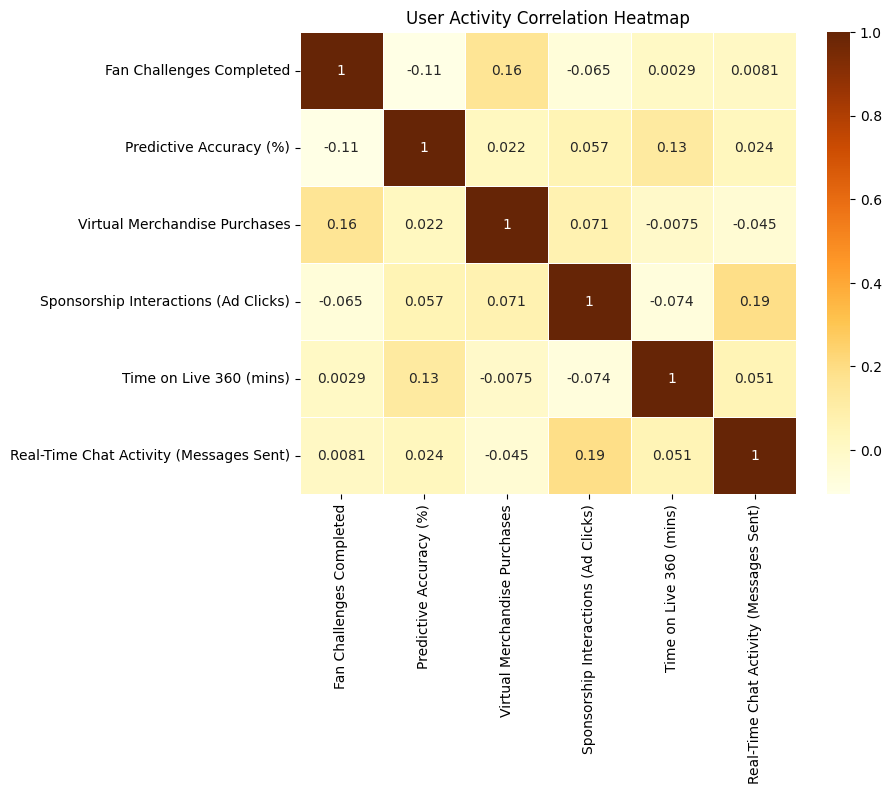

In [189]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("User Activity Correlation Heatmap")
plt.show()

Analysis on this heatmap before we move on to further clustering:
- There is a slight positive correlation (0.16) between Fan Challenges Completed and Virtual Merchandise Purchases. Although the correlation is weak, it suggests that users who complete fan challenges might be a bit more likely to purchase virtual merchandise.
  - **Recommendation**: Consider incentivizing fan challenge completions with rewards related to merchandise. For example, providing exclusive virtual merchandise for users who complete a certain number of challenges.
- There is a slight positive correlation (0.19) between Sponsorship Interactions (Ad Clicks) and Real-Time Chat Activity. This indicates that users who are active in chat are slightly more likely to click on ads.
  - **Recommendation**: Use interactive ad campaigns in live chats, such as polls sponsored by brands, to encourage increased engagement and more sponsorship clicks.
- There is a weak positive correlation (0.13) between Predictive Accuracy (%) and Time on Live 360 (mins). This could suggest that users who are more accurate in fan challenges are also spending slightly more time watching live coverage.
  - **Recommendation**: Highlight the achievements of high-predictive users during live coverage to encourage others to spend more time in the app and improve their predictive accuracy.
- **Low Correlation** over all from this heatmap
- **Next step:** Segment users based on their primary engagement activity (e.g., fan challenges, sponsorship interactions, virtual merchandise purchases) and create targeted strategies for each segment.

## Clustering

In [190]:
# Which users are most likely to purchase virtual merchandise?
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

In [191]:
def plot_kMeans(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    df_num_copy = df_num.copy()
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_num_copy.columns)
    df_num_copy['Cluster'] = clusters  # Add cluster info to DataFrame
    average_per_cluster = df_num_copy.groupby('Cluster').mean()
    print("Cluster Centers:\n", cluster_centers)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Distribution of Each Cluster by User Behavior Metrics', fontsize=16)
    
    # Plotting each feature distribution per cluster
    features = [
        "Fan Challenges Completed",
        "Predictive Accuracy (%)",
        "Virtual Merchandise Purchases",
        "Sponsorship Interactions (Ad Clicks)",
        "Time on Live 360 (mins)",
        "Real-Time Chat Activity (Messages Sent)"
    ]
    
    # Looping through each feature and plotting it
    for i, feature in enumerate(features):
        row, col = divmod(i, 3)
        for cluster in df_num_copy['Cluster'].unique():
            subset = df_num_copy[df_num_copy['Cluster'] == cluster]
            axes[row, col].hist(subset[feature], bins=5, alpha=0.5, label=f'Cluster {cluster}')
        
        axes[row, col].set_title(feature)
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Count')
        axes[row, col].legend()
    
    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Find the best k:

#### Elbow Method

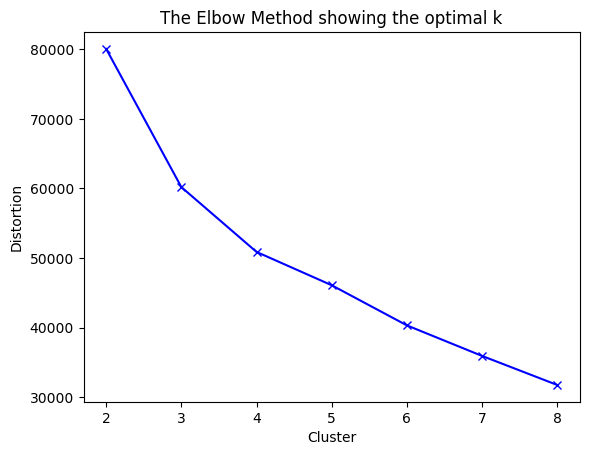

In [192]:
distortions = []
K = range(2,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeanModel.fit(df_num)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

By using the the "sum of squared errors" metric along with the elbow method, **the optimal K is 4**.

Cluster Centers:
    Fan Challenges Completed  Predictive Accuracy (%)  \
0                 -0.750932                 0.056987   
1                  0.717154                 0.596755   
2                 -0.604284                 0.192780   
3                  0.636241                -1.280851   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                      -0.187043                              0.928221   
1                       0.615948                              0.280828   
2                      -0.657969                             -0.965215   
3                       0.032534                             -0.708481   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                -0.269246                                 0.635107  
1                 0.304743                                -0.175230  
2                 0.260496                                -0.774450  
3                -0.402055                        

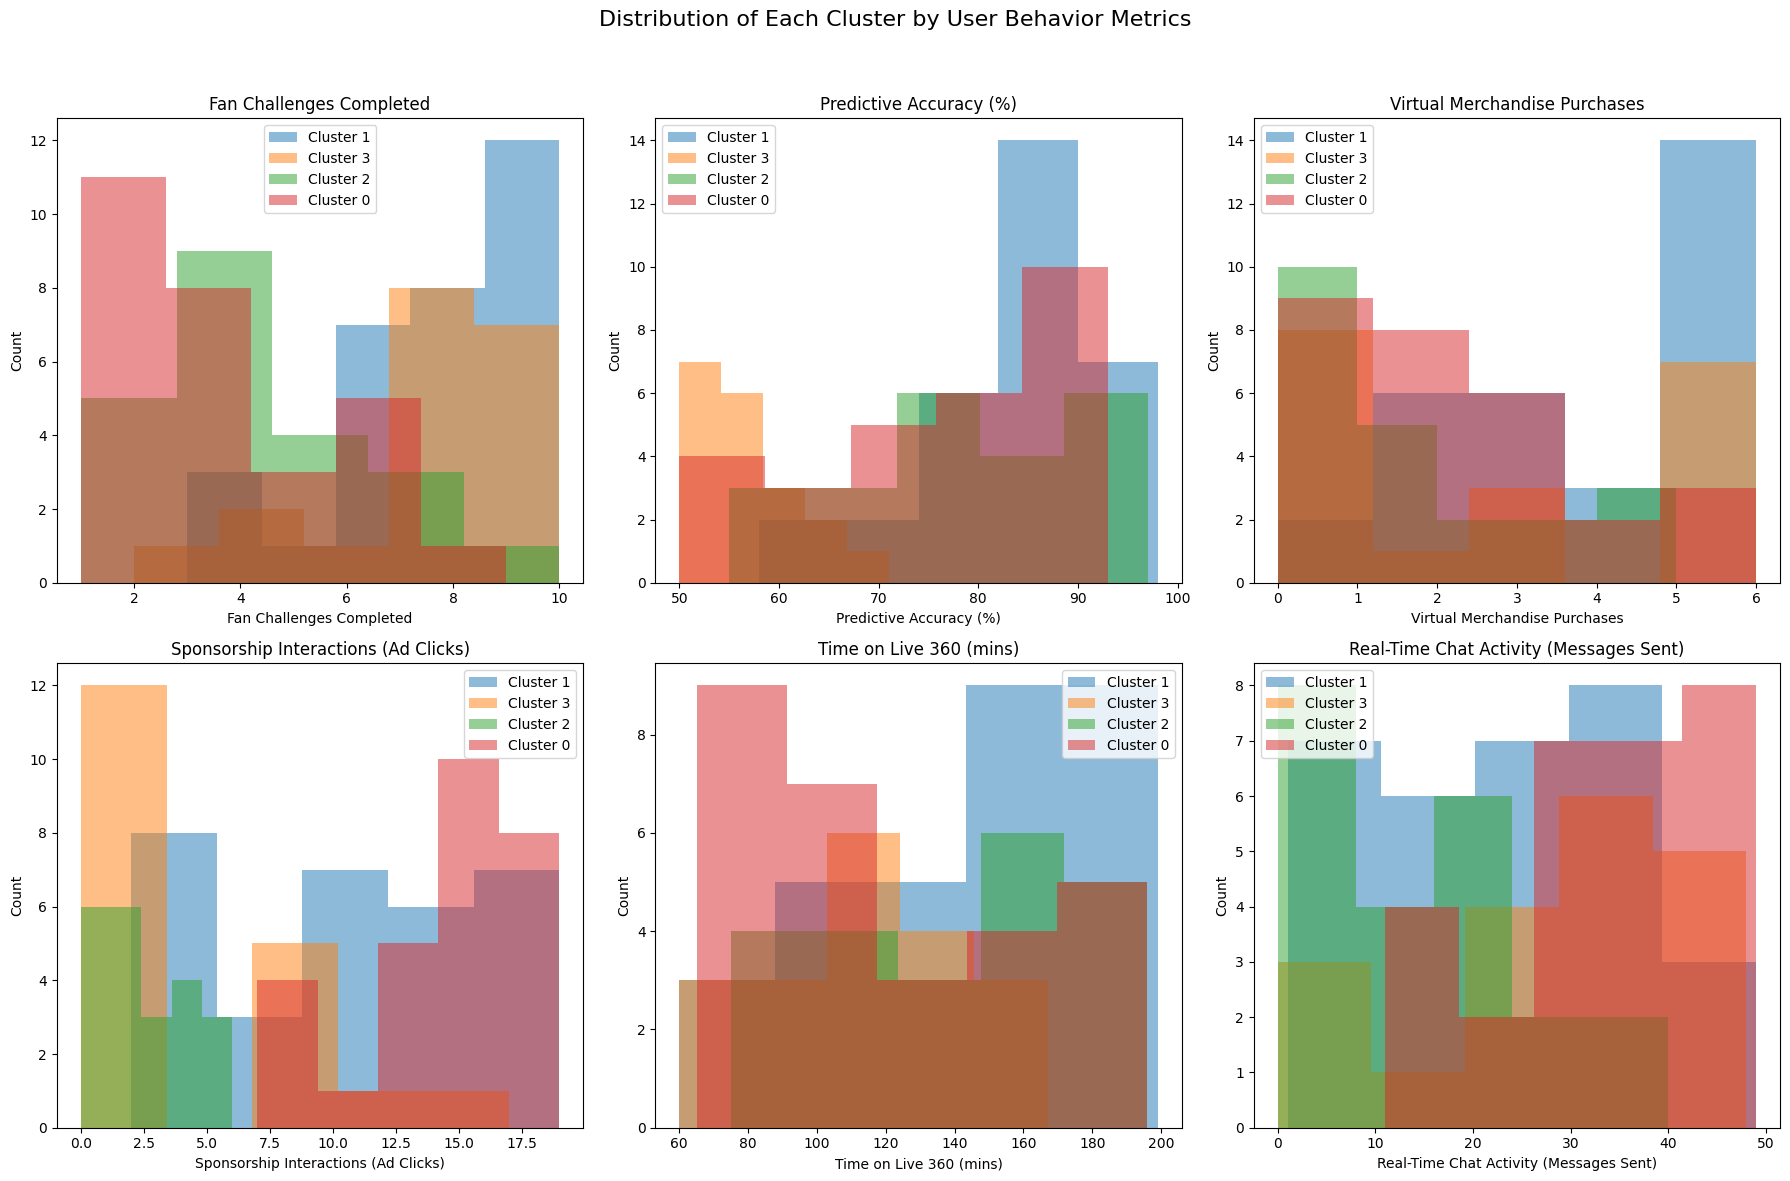

In [193]:
plot_kMeans(4)

#### Silhouette Score

In [194]:
def k_means_silhouette():
    df_num_copy = df_num.copy()
    k_values = [2, 3, 4, 5, 6, 7, 8]
    kmeans = [KMeans(n_clusters=k_value, random_state=42) for k_value in k_values]
    silhouette_scores = [silhouette_score(df_num_copy, each_kmeans.fit(df_num_copy).labels_) for each_kmeans in kmeans]
    print(kmeans)
    print(silhouette_scores)
    return max(silhouette_scores)
k_means_silhouette()

[KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42)]
[0.46388591305599897, 0.3453443397291941, 0.2764320267783463, 0.26517666319037003, 0.24775373695284236, 0.2601939302342696, 0.26744459831384876]


0.46388591305599897

**Silhouette scores and elbow selected different Ks. We thus, want to:**
- apply Davies-Bouldin Index and Calinski-Harabasz Index for different values of k to help reconcile the conflicting results
- visualize the clustering for k=2, k=3, and k=4 using PCA, so we can see if there’s a natural separation that looks better for any particular value.

#### Feature Engineering and other metrics scores
Including:
> Davies-Bouldin Scores

> Calinski-Harabasz Scores

In [195]:
# Adding new features to enrich the dataset
df_copy = df.copy()
df_copy['Engagement Index'] = (
    df_copy['Fan Challenges Completed'] * 0.4 +
    df_copy['Time on Live 360 (mins)'] * 0.3 +
    df_copy['Real-Time Chat Activity (Messages Sent)'] * 0.3
)

df_copy['Purchase Tendency'] = (
    df_copy['Virtual Merchandise Purchases'] * 0.5 +
    df_copy['Sponsorship Interactions (Ad Clicks)'] * 0.5
)

# Selecting relevant columns for clustering
features_for_clustering = df_copy.drop(columns=['User ID'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

k_values = [2, 3, 4]
davies_bouldin_scores = {}
calinski_harabasz_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_clusters = kmeans.fit_predict(scaled_features)

    # Davies-Bouldin Index and Calinski-Harabasz Index
    davies_bouldin_scores[k] = davies_bouldin_score(scaled_features, kmeans_clusters)
    calinski_harabasz_scores[k] = calinski_harabasz_score(scaled_features, kmeans_clusters)

print("Davies-Bouldin Scores:", davies_bouldin_scores)
print("Calinski-Harabasz Scores:", calinski_harabasz_scores)

Davies-Bouldin Scores: {2: 1.8924707563537018, 3: 1.646638169516806, 4: 1.6501929833267788}
Calinski-Harabasz Scores: {2: 26.05413797870169, 3: 24.100203548754678, 4: 19.79768938933235}


> **Davies-Bouldin Scores (Lower values indicate better clustering):**
- k=2: 1.89 – The highest score, suggesting that this clustering configuration has the least compact clusters.
- k=3: 1.65 – The lowest Davies-Bouldin score, indicating that k=3 yields more compact and well-separated clusters.
- k=4: 1.65 – Very similar to k=3, which means adding more clusters beyond k=3 doesn’t significantly improve compactness.

> **Calinski-Harabasz Scores (Higher values indicate better-defined clusters):**
- k=2: 26.05 – The highest score, indicating that k=2 provides the most distinct clusters in terms of between-cluster separation.
- k=3: 24.10 – Still reasonably high, meaning the clusters are fairly well-separated, although less than for k=2.
- k=4: 19.80 – The lowest score, suggesting that increasing to k=4 reduces cluster distinctiveness, potentially due to over-segmentation.

#### Insights on Choosing the Best k:
- k=2:
Best between-cluster separation, providing a simple segmentation of users.
If the goal is to have distinct and easily recognizable groups, k=2 is a good choice.

- k=3:
Compactness is better compared to k=2, and it gives slightly more detailed differentiation between user behaviors.
If we want to capture more detailed distinctions in user behavior while maintaining relatively good separation, k=3 might be better.

- k=4:
Both metrics indicate a decline in cluster quality, suggesting that k=4 might be over-segmenting the data, which is less effective for the user base.

**I would prefer to choose k=3. Proven by below detailed visualization.**

### Visualize using PCA

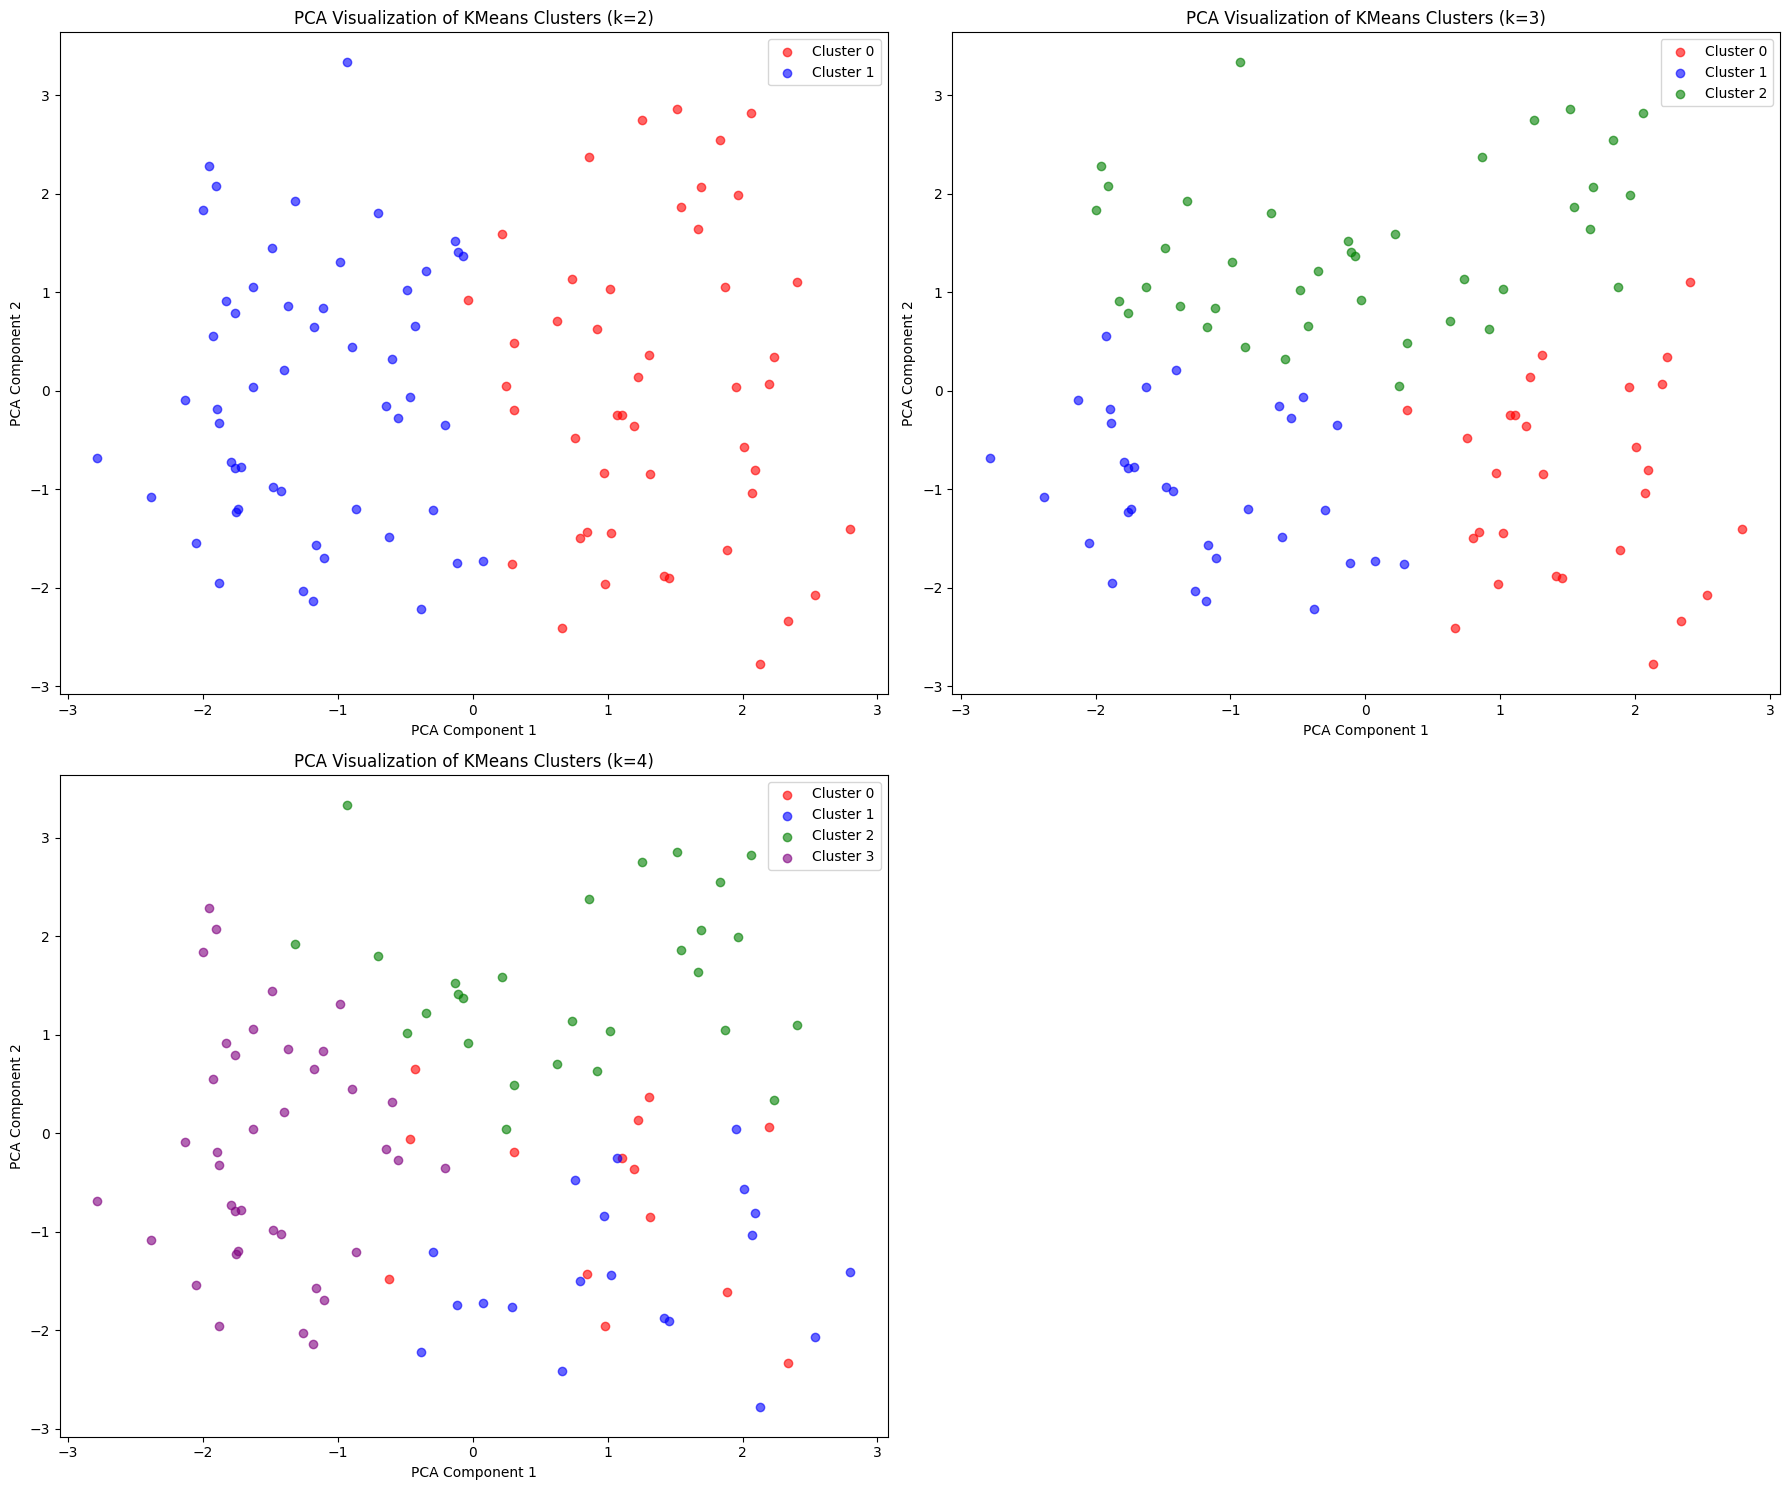

In [196]:
# Visualizing the clusters for k=2, k=3, and k=4 using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(18, 15))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_clusters = kmeans.fit_predict(scaled_features)
    
    plt.subplot(2, 2, i + 1)
    colors = ['red', 'blue', 'green', 'purple']
    for cluster in range(k):
        subset = pca_df[kmeans_clusters == cluster]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', color=colors[cluster], alpha=0.6)

    plt.title(f'PCA Visualization of KMeans Clusters (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()

plt.tight_layout()
plt.show()

## Analyze based on kmeans segmentation method (k=3)

In [197]:
km_result = df_copy.copy()
scaler = StandardScaler()
features = df_copy.drop(columns=['User ID'])
feature_names = features.columns
scaled_data = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
km_result['Cluster'] = clusters
km_result.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement Index,Purchase Tendency,Cluster
0,U001,5,80,3,10,120,20,44.0,6.5,2
1,U002,8,60,1,8,100,35,43.7,4.5,2
2,U003,3,90,0,6,90,5,29.7,3.0,2
3,U004,7,70,2,15,140,40,56.8,8.5,0
4,U005,2,50,5,3,60,8,21.2,4.0,2


In [198]:
cluster_summary_stats = km_result.drop(columns=['User ID']).groupby('Cluster').agg(['mean', 'std'])

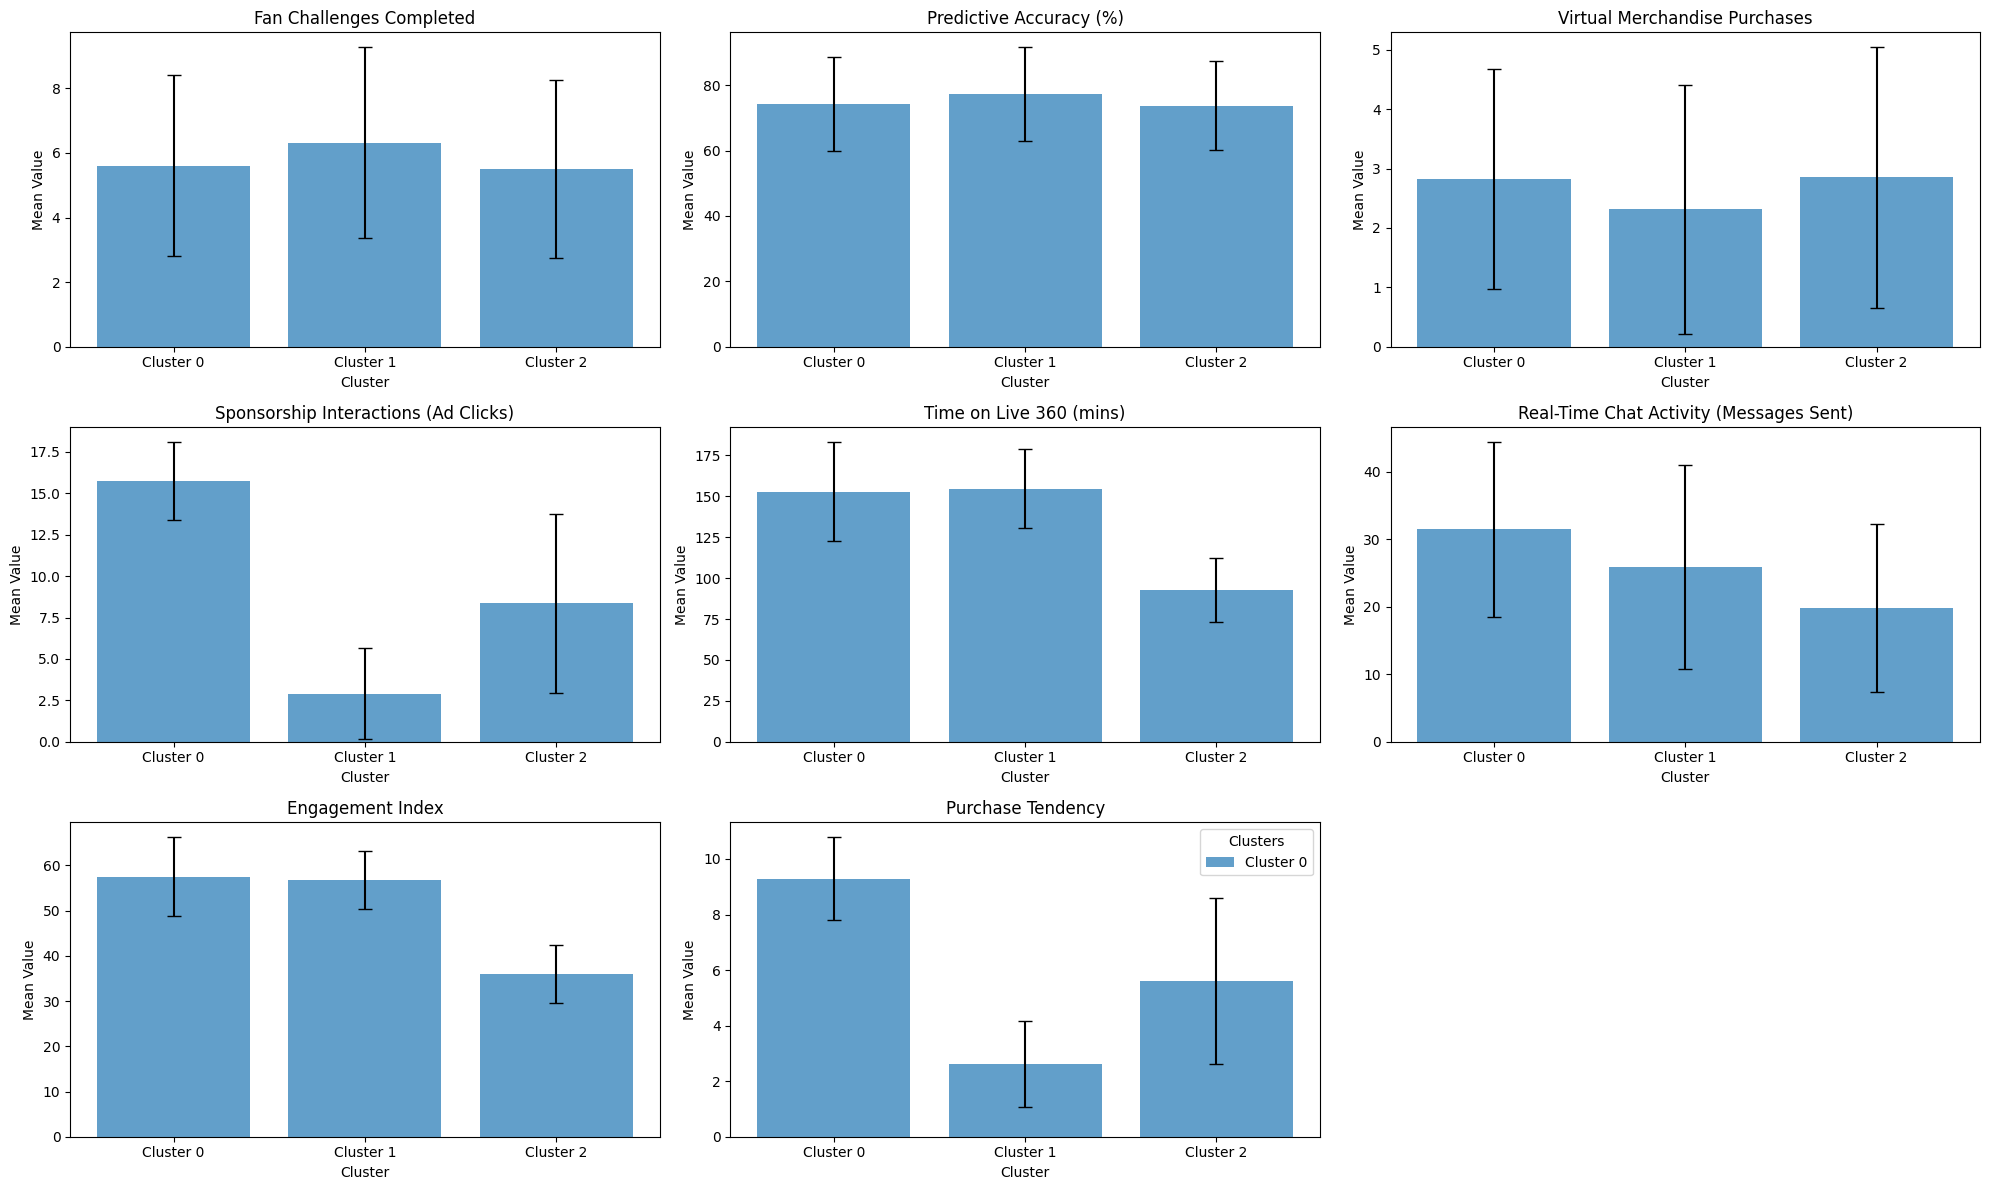

In [199]:
plt.figure(figsize=(20, 12))

for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    means = cluster_summary_stats[(feature, 'mean')]
    stds = cluster_summary_stats[(feature, 'std')]
    plt.bar(range(3), means, yerr=stds, capsize=5, alpha=0.7, tick_label=[f'Cluster {i}' for i in range(3)])
    plt.title(feature)
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')

plt.tight_layout()
plt.legend(title="Clusters", labels=[f'Cluster {i}' for i in range(k)])
plt.show()

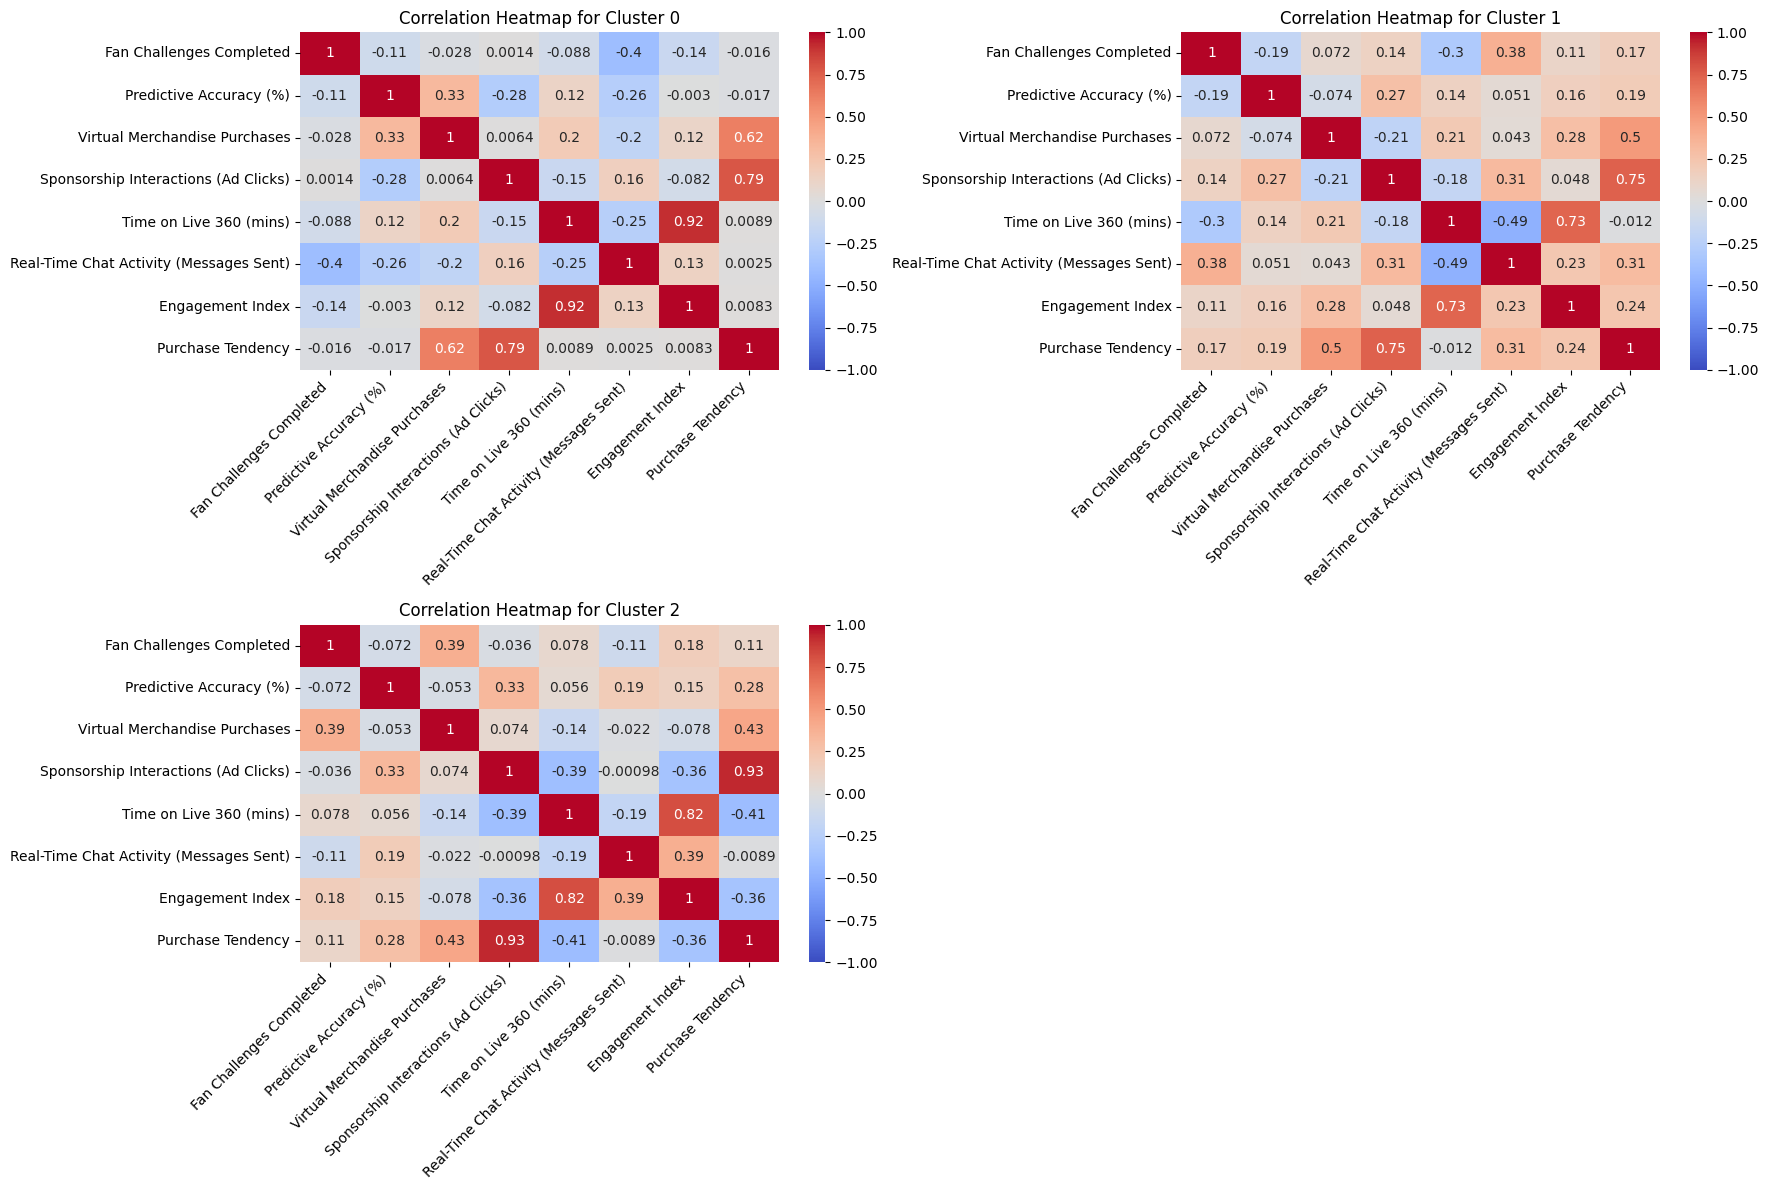

In [200]:
# Correlation analysis
cluster_correlations = {}
for cluster in range(3):
    cluster_data = km_result[km_result['Cluster'] == cluster]
    correlations = cluster_data[feature_names].corr()
    cluster_correlations[cluster] = correlations

plt.figure(figsize=(18, 12))
for cluster in range(3):
    plt.subplot(2, 2, cluster + 1)
    sns.heatmap(cluster_correlations[cluster], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Insights on customer behaviors and recommendations:

#### Cluster 0: rational users
##### Predictive Accuracy and Virtual Merchandise Purchase (0.33):
Since Purchase Tendency is partially based on Sponsorship Interactions, the strong positive correlation is expected. But this cluster has already been the one with the closest number of correlation between 0.62 (virtual merchanise purchases and purchase tendency) and 0.79 (ads clicks and purchase tendency). It indicates that compared to the other two clusters, in cluster 0, users who interact more with ads are also likely to purchase merchandise, confirming that these two behaviors are strongly connected.
**From this insight: we could provide these users some tutorials or analysis from experts to help with their prediction process, so as to increase predictive accuracy. Besides, we can consider charging on these articles or helper methods.**

##### Sponsorship Interactions and Purchase Tendency (0.79):
Since Purchase Tendency is partially based on Sponsorship Interactions, the strong positive correlation is expected. But this cluster has already been the one with the closest number of correlation between 0.62 (virtual merchanise purchases and purchase tendency) and 0.79 (ads clicks and purchase tendency). **Also, from the bar chart above the heatmap, cluster 0 has the highest average number of ads interaction.** **It indicates that compared to the other two clusters, in cluster 0, users who interact more with ads are also likely to purchase merchandise.**

#### Cluster 1: live watchers
##### Time on Live 360 and Virtual Merchandise Purchase (0.21):
A direct, positive correlation between Time on Live 360 and Virtual Merchandise Purchase suggests that time spent engaging with live events has a direct impact on a user's willingness to interact with ads or make purchases. 
**To capitalize on this, we could promote merchandise and sponsorship ads during live events, as those already spending significant time on live coverage are more likely to respond positively to such promotions.**

##### Sponsorship Interactions and Virtual Merchandise Purchase (-0.21):
The negative correlation suggests that users who interact more with sponsorship ads are less likely to purchase virtual merchandise.
Users who are interacting frequently with ads may need additional motivation to purchase virtual merchandise.
Possible approaches include:
- **Ad-Incentivized Merchandise Promotions: Link ad interactions with merchandise discounts or exclusive items. For example, users could unlock an exclusive virtual item or receive a discount code after interacting with a certain number of ads.**
- Segment-Specific Campaigns: Since sponsorship interactions and merchandise purchases are negatively correlated, we may need to create distinct marketing strategies:
    - For users who focus more on sponsorship interactions, provide incentives to engage with merchandise (e.g., by offering merchandise tied directly to ads or promotions).
    - For users who are more focused on purchasing merchandise, emphasize exclusive offers not tied to sponsorship interactions, allowing them to purchase without needing to engage in ads.

##### Engagement Index and Virtual Merchandise Purchase (0.28):
Users who engage in either chat activities, lives (especially on lives because of the 0.73 correlation rate), or fan challenges are more likely to purchase virtual merchandise. **Recommendation: Personalized Merchandise Offers: Consider targeting highly engaged users (those with a higher Engagement Index) with special offers or exclusive virtual items to capitalize on their broader activity.**

#### Cluster 2: introverted users
##### Fan Challenges Completed and Virtual Merchandise Purchase (0.39):
**Recommendations: Challenge-Based Rewards:**
- Offer merchandise-related rewards for users who complete or perform well in fan challenges. For example:
- Discount codes or exclusive virtual items could be given as rewards for accurately predicting race outcomes or for completing a certain number of challenges.
This will create an additional incentive to participate in challenges and increase the likelihood of users purchasing virtual items.
- Leverage the Competitive Spirit:
    - i.e. adding leaderboards or progress tracking where users who complete challenges could unlock unique virtual merchandise. This could enhance the competitive spirit and drive further purchases.

<div class="alert alert-block alert-info">
By far the clustering has been pretty insightful, but we also want to try out predictive models to serve as proof and reference to support our insights.
</div>

## Predictive Model

In [201]:
# Function to train models and evaluate performance
df_md = km_result.drop(columns=['User ID'])
def train_and_evaluate_models(df=df_md, features=None, y_col_name=None):
    # Selecting features and creating a target variable for classification
    X = df[features]
    y = df[y_col_name]

    # # Train-test split
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # # Standardize the feature set
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Classification Report
    # Model 1: Logistic Regression with Bagging
    log_model = LogisticRegression(random_state=42, multi_class='ovr', max_iter=1000)
    bagging_log_model = BaggingClassifier(log_model, n_estimators=10, random_state=42)

    # Parameter tuning for Bagging Logistic Regression
    param_grid_log = {
        'estimator__C': [0.1, 1, 10],
        'n_estimators': [5, 10, 20]
    }
    grid_search_log = GridSearchCV(bagging_log_model, param_grid_log, cv=skf, scoring='neg_mean_squared_error')
    grid_search_log.fit(X, y)
    bagging_log_model_best = grid_search_log.best_estimator_

    print("Best parameters for Bagging Logistic Regression:", grid_search_log.best_params_)

    # Evaluate tuned Bagging Logistic Regression
    log_mse_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        bagging_log_model_best.fit(X_train, y_train)
        y_pred_log = bagging_log_model_best.predict(X_test)
        mse = mean_squared_error(y_test, y_pred_log)
        log_mse_scores.append(mse)
        print("Logistic Regression with Bagging Classification Report:\n", classification_report(y_test, y_pred_log, zero_division=1))
    print("Logistic Regression with Bagging Cross-Validation MSE Scores:", log_mse_scores)
    print("Mean MSE:", np.mean(log_mse_scores))

    # Model 2: Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    # Parameter tuning for Random Forest
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=skf, scoring='neg_mean_squared_error')
    grid_search_rf.fit(X, y)
    rf_model_best = grid_search_rf.best_estimator_

    print("Best parameters for Random Forest:", grid_search_rf.best_params_)

    # Evaluate tuned Random Forest
    rf_mse_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf_model_best.fit(X_train, y_train)
        y_pred_rf = rf_model_best.predict(X_test)
        mse = mean_squared_error(y_test, y_pred_rf)
        rf_mse_scores.append(mse)
        print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))
    print("Random Forest Cross-Validation MSE Scores:", rf_mse_scores)
    print("Mean MSE:", np.mean(rf_mse_scores))

    best_model = None
    # Selecting the model with the smallest MSE
    if np.mean(log_mse_scores) < np.mean(rf_mse_scores):
        best_model = bagging_log_model_best
        model_name = "Logistic Regression with Bagging"
        residual = np.mean(log_mse_scores)
    else:
        best_model = rf_model_best
        model_name = "Random Forest"
        residual = np.mean(rf_mse_scores)

    print(f"\nBest Model: {model_name}, average residual {residual}")

    # Plotting residuals for the best model
    y_pred_best = best_model.predict(X)
    residuals = y - y_pred_best
    plt.figure(figsize=(10, 6))
    plt.scatter(y, residuals, alpha=0.6, color='b')
    plt.axhline(0, color='r', linestyle='--', lw=2)
    plt.xlabel('Actual Purchase Category')
    plt.ylabel('Residuals')
    plt.title(f'Best Residual Plot ({model_name})')
    plt.tight_layout()
    plt.show()
    
    # Get feature importance
    rf_model.fit(X, y)
    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance from Random Forest:")
    print(feature_importance_df)
    return best_model

Best parameters for Bagging Logistic Regression: {'estimator__C': 10, 'n_estimators': 20}
Logistic Regression with Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       4.0
           1       0.00      0.00      0.00       3.0
           2       0.00      0.00      0.00       3.0
           3       0.00      0.00      0.00       4.0
           4       1.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       3.0

    accuracy                           0.00      20.0
   macro avg       0.14      0.00      0.00      20.0
weighted avg       0.05      0.00      0.00      20.0

Logistic Regression with Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.25      0.25   

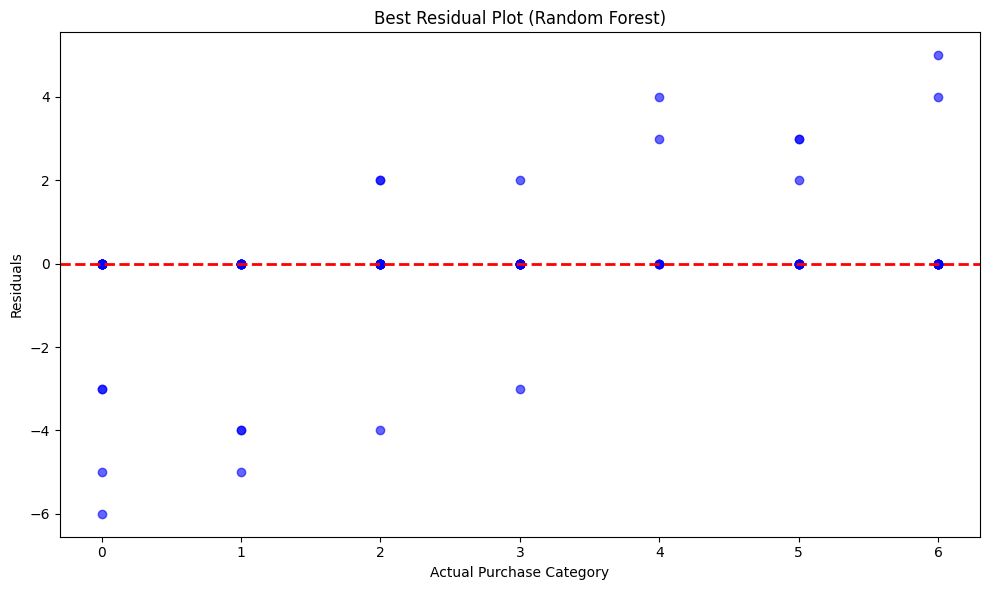


Feature Importance from Random Forest:
                                   Feature  Importance
3                  Time on Live 360 (mins)    0.174521
4  Real-Time Chat Activity (Messages Sent)    0.169350
2     Sponsorship Interactions (Ad Clicks)    0.167413
5                         Engagement Index    0.165964
1                  Predictive Accuracy (%)    0.158171
0                 Fan Challenges Completed    0.126574
6                                  Cluster    0.038007


In [202]:
m1 = train_and_evaluate_models(df_md, [
        "Fan Challenges Completed", "Predictive Accuracy (%)", "Sponsorship Interactions (Ad Clicks)",
        "Time on Live 360 (mins)", "Real-Time Chat Activity (Messages Sent)", "Engagement Index", "Cluster"
    ], "Virtual Merchandise Purchases")

<div class="alert alert-block alert-info">    
    <b>Now we noticed that it is not practical/necessary to predit on exact purchase amount, considering we only have one observation per user. Thus, we will want to visualize the distribution of the purchases, and categorize them.</b>
</div>

### Model Optimization

#### Categorization

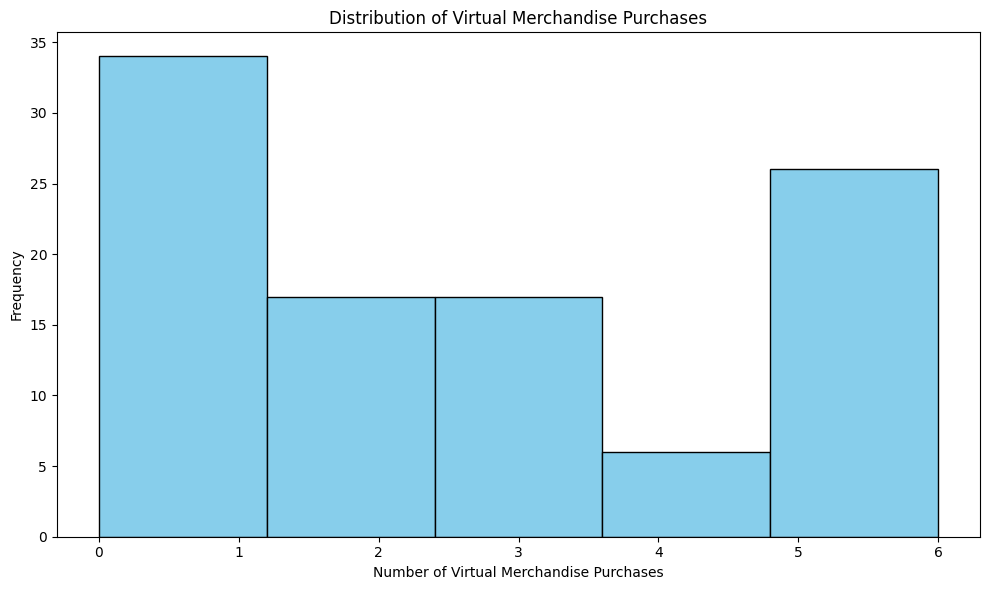

In [203]:
# Plotting histogram of Virtual Merchandise Purchases
plt.figure(figsize=(10, 6))
plt.hist(df['Virtual Merchandise Purchases'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Number of Virtual Merchandise Purchases')
plt.ylabel('Frequency')
plt.title('Distribution of Virtual Merchandise Purchases')
plt.tight_layout()
plt.show()

In [204]:
# Creating a new classification column based on the number of purchases
def classify_purchases(purchases):
    if purchases == 0:
        return 'No Purchases'
    elif 1 <= purchases <= 3:
        return 'Medium Purchases'
    else:
        return 'High Purchases'

df_md['Purchase Category'] = df_md['Virtual Merchandise Purchases'].apply(classify_purchases)

# Encoding the purchase category for modeling
category_mapping = {'No Purchases': 0, 'Medium Purchases': 1, 'High Purchases': 2}
df_md['Purchase Category'] = df_md['Purchase Category'].map(category_mapping)

Best parameters for Bagging Logistic Regression: {'estimator__C': 10, 'n_estimators': 5}
Logistic Regression with Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.43      0.60      0.50        10
           2       0.00      0.00      0.00         6

    accuracy                           0.35        20
   macro avg       0.23      0.28      0.25        20
weighted avg       0.26      0.35      0.30        20

Logistic Regression with Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.45      0.50      0.48        10
           2       0.33      0.33      0.33         6

    accuracy                           0.35        20
   macro avg       0.26      0.28      0.27        20
weighted avg       0.33      0.35      0.34        20

Logistic Regression with Bagging Cl

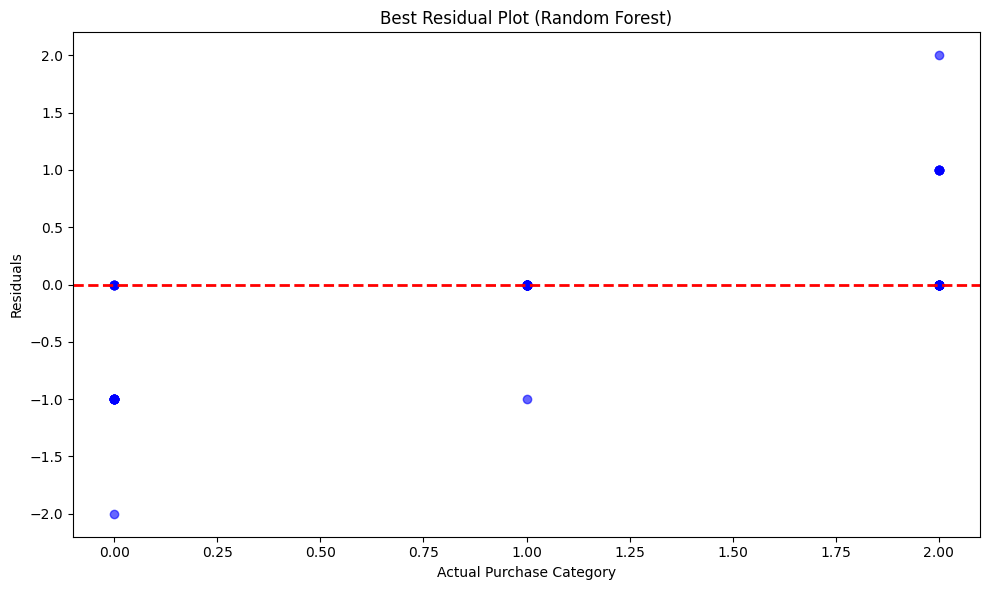


Feature Importance from Random Forest:
                                   Feature  Importance
3                  Time on Live 360 (mins)    0.191849
5                         Engagement Index    0.178461
4  Real-Time Chat Activity (Messages Sent)    0.173091
1                  Predictive Accuracy (%)    0.159094
2     Sponsorship Interactions (Ad Clicks)    0.142058
0                 Fan Challenges Completed    0.119225
6                                  Cluster    0.036222


In [205]:
m2 = train_and_evaluate_models(df_md, [
        "Fan Challenges Completed", "Predictive Accuracy (%)", "Sponsorship Interactions (Ad Clicks)",
        "Time on Live 360 (mins)", "Real-Time Chat Activity (Messages Sent)", "Engagement Index", "Cluster"
    ], "Purchase Category")

<div class="alert alert-block alert-danger">
    Quite good already, but we can perform some feature engineering to further reduce the error.
</div>

#### Feature Engineering

In [206]:
def feature_engineering(df=df_md, feature_names=None, features_wo_poly=None, degree=2):
    X = df[feature_names]
    
    # Adding Polynomial Features
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(feature_names))

    # Adding square and cube features
    X_squared = X ** 2
    X_squared.columns = [f'{col}^2' for col in X.columns]
    X_cubed = X ** 3
    X_cubed.columns = [f'{col}^3' for col in X.columns]

    if features_wo_poly != None:
        X2 = df[features_wo_poly]
        X_combined = pd.concat([X_poly_df, X_squared, X_cubed, X2], axis=1)
    else:
        # Concatenate original, squared, and cubed features
        X_combined = pd.concat([X_poly_df, X_squared, X_cubed], axis=1)
    
    # Standardize the feature set
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_combined)

    X_scaled_df = pd.DataFrame(X_scaled, columns=X_combined.columns)
    return X_scaled_df, X_combined.columns

Best parameters for Bagging Logistic Regression: {'estimator__C': 0.1, 'n_estimators': 5}
Logistic Regression with Bagging Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.47      0.80      0.59        10
           2       0.00      0.00      0.00         6

    accuracy                           0.40        20
   macro avg       0.49      0.27      0.20        20
weighted avg       0.44      0.40      0.30        20

Logistic Regression with Bagging Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.50      0.80      0.62        10
           2       0.50      0.33      0.40         6

    accuracy                           0.50        20
   macro avg       0.67      0.38      0.34        20
weighted avg       0.60      0.50      0.43        20

Logistic Regression with Bagging C

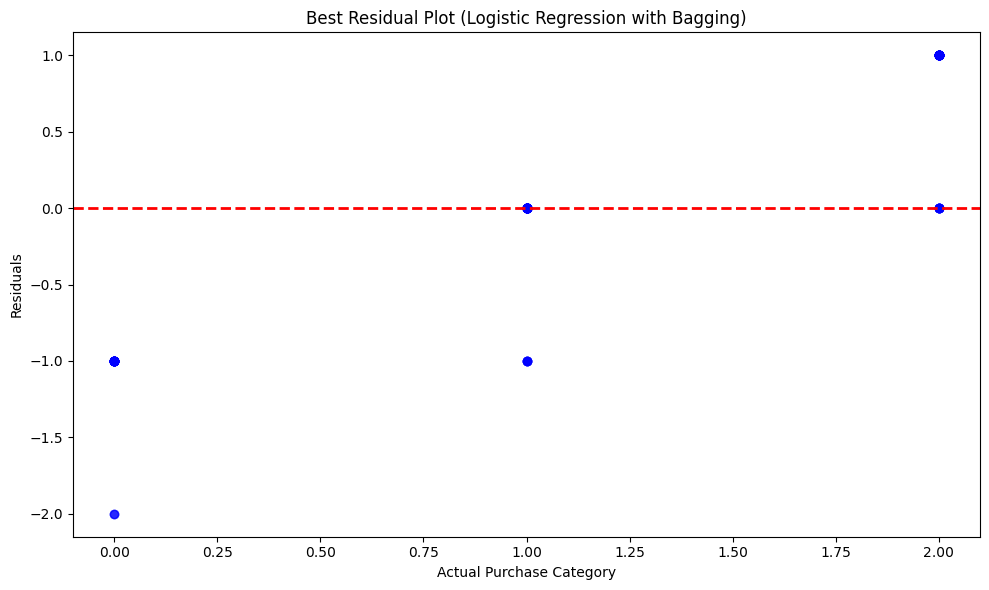


Feature Importance from Random Forest:
                                              Feature  Importance
5   Time on Live 360 (mins) Real-Time Chat Activit...    0.090869
1                             Time on Live 360 (mins)    0.089978
8                           Time on Live 360 (mins)^2    0.088342
4   Predictive Accuracy (%) Real-Time Chat Activit...    0.085602
11                          Time on Live 360 (mins)^3    0.083792
7                           Predictive Accuracy (%)^2    0.083261
3     Predictive Accuracy (%) Time on Live 360 (mins)    0.079345
0                             Predictive Accuracy (%)    0.074348
12          Real-Time Chat Activity (Messages Sent)^3    0.065966
10                          Predictive Accuracy (%)^3    0.065468
9           Real-Time Chat Activity (Messages Sent)^2    0.064907
6   Predictive Accuracy (%) Time on Live 360 (mins...    0.064607
2             Real-Time Chat Activity (Messages Sent)    0.063515


In [207]:
X_scaled, feature_names_out = feature_engineering(df=df_md, 
                                                  # Choose the top 3 significant variables identified in Feature Importance from Random Forest
                                                  feature_names=["Predictive Accuracy (%)", "Time on Live 360 (mins)", "Real-Time Chat Activity (Messages Sent)"],
                                                  degree=3
                                                 )
X_scaled['Purchase Category'] = df_md['Purchase Category']
m3 = train_and_evaluate_models(X_scaled, 
                          feature_names_out, 
                          'Purchase Category')

### Insights from model

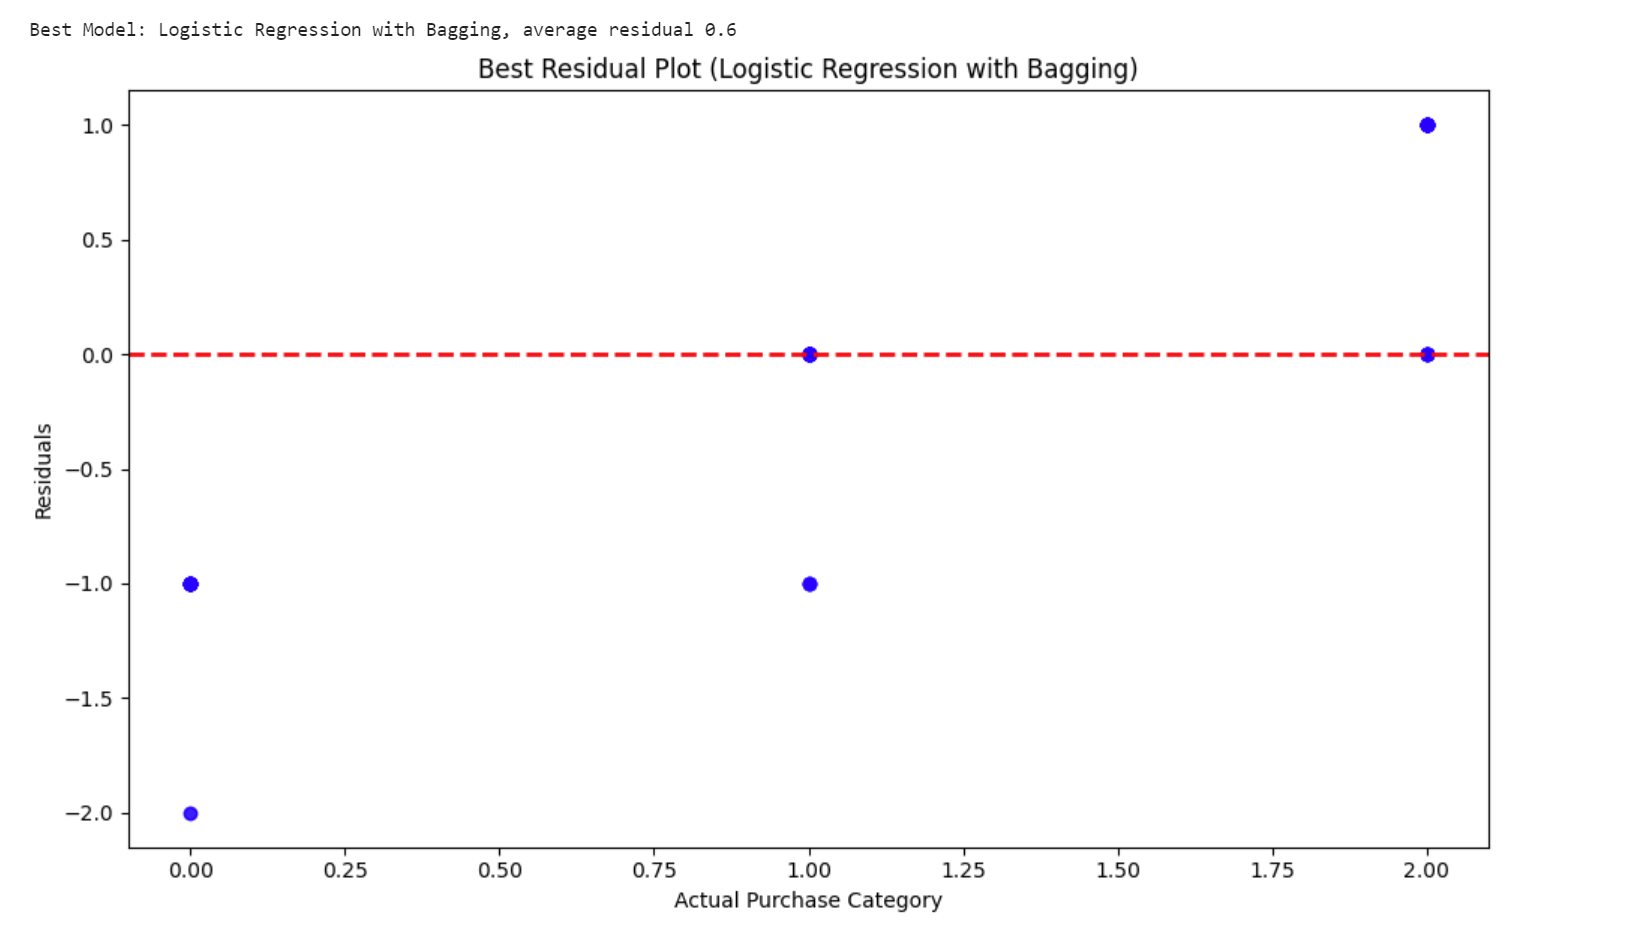

*FROM ABOUT FIGURE*

**Best Model**: The **Logistic Regression with Bagging** model was selected as the best model based on the lowest average **MSE of 0.6**. Although better metrics can be used (i.e. RMSE), this result can sufficiently indicate that the model **effectively** minimized prediction errors compared to the Random Forest.

**Residual Analysis**: The residual plot for the Logistic Regression with Bagging model showed a generally good fit, with most residuals centered around zero. This indicates that the model's predictions are, on average, close to the actual values.

**Feature Importance**: Feature importance analysis from the Random Forest model highlighted that the **Engagement Index**, **Time on Live 360**, and **Fan Challenges Completed** were among the most influential features in predicting virtual merchandise purchases.

**Future Improvement**: 

- Future iterations could benefit from adding more features, such as user demographics or behavioral data, to provide a more comprehensive understanding of what drives purchases.

- The logistic Regression and can be packaged and deployed for use in real-time predictions, potentially integrating with the app to suggest merchandise in response to user actions.

<div class="alert alert-block alert-danger">
    Not yet finished! Thank you for reading so far, let's move on to the next phase.
</div>
    
<div class="alert alert-block alert-info">
Now we will summarize the insights from above, and propose a fan challenge. And then use the best model to predict the outcome.
</div>

## Proposed Fan Challenge: 'Ad-Boosted Prediction Challenge'

### Challenge Overview

> #### Based on the insights from K-Means clustering and predictive model analysis, we propose a new fan challenge called the 'Ad-Boosted Prediction Challenge'. This challenge targets different user clusters in tailored ways to maximize engagement and virtual merchandise purchases.

Objective: Encourage users to make predictions about race outcomes, with added incentives for interacting with sponsorship ads. This challenge is designed to leverage the behaviors observed in different user clusters.

### Challenge Details
#### 1. User Participation:

Users are encouraged to predict various aspects of an upcoming autonomous vehicle race, such as which team will achieve the fastest lap or which vehicle will complete the most laps without needing a recharge.

Users are prompted to interact with sponsored ads during the prediction process. Higher ad interactions will increase the likelihood of better rewards if predictions are accurate.

#### 2. Cluster-Specific Design:

##### Cluster 0 (Rational Users): Users in this group are already likely to interact with ads and make purchases. For this group:

Expert Insights: Offer users optional paid insights or tutorials from experts to help improve their predictions.

Reward Boost: Users who interact with ads will receive boosted rewards for correct predictions (e.g., exclusive virtual items or advanced tutorials).

##### Cluster 1 (Live Watchers): Users who spend significant time on live events but are less likely to buy merchandise. For this group:

Live Event Promotions: Merchandise ads and rewards will be prominently displayed during live events.

Ad-Incentivized Merchandise: Users will receive special discounts for merchandise after interacting with a certain number of ads.

##### Cluster 2 (Introverted Users): Users who prefer challenges but show less overall engagement. For this group:

Challenge-Based Merchandise Rewards: Offer discounts or exclusive virtual items for users who complete a set number of fan challenges.

Competitive Leaderboard: Introduce a leaderboard to motivate users to engage more with challenges, with top performers unlocking unique merchandise.

### Prepare for simulation

First I looked into the mean, median, average difference, max, min values of each variable of each clusters.

In [208]:
df_md.diff().abs().groupby("Cluster").mean()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement Index,Purchase Tendency,Purchase Category
Cluster,,,,,,,,,
0.0,3.586207,18.62069,1.793103,4.793103,25.068966,14.62069,7.134483,2.465517,0.551724
1.0,3.940000,14.40000,2.360000,9.560000,51.160000,16.44000,16.172000,5.320000,0.760000
2.0,3.750000,17.25000,2.700000,7.450000,65.250000,18.45000,24.050000,3.775000,0.800000


In [209]:
df_md.groupby("Cluster").max()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement Index,Purchase Tendency,Purchase Category
Cluster,,,,,,,,,
0,10,93,6,19,199,49,72.6,11.5,2
1,10,98,6,10,196,49,66.9,5.5,2
2,10,93,6,19,130,44,46.5,11.0,2


In [210]:
df_md.groupby("Cluster").min()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement Index,Purchase Tendency,Purchase Category
Cluster,,,,,,,,,
0,1,50,0,11,81,7,39.3,6.5,0
1,1,50,0,0,107,0,45.1,0.0,0
2,1,50,0,0,60,0,21.2,1.0,0


In [211]:
df_md.groupby("Cluster").mean()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement Index,Purchase Tendency,Purchase Category
Cluster,,,,,,,,,
0,5.607143,74.285714,2.821429,15.75000,152.892857,31.464286,57.55000,9.285714,1.178571
1,6.312500,77.187500,2.312500,2.90625,154.718750,25.968750,56.73125,2.609375,0.968750
2,5.500000,73.725000,2.850000,8.35000,92.575000,19.825000,35.92000,5.600000,1.200000


### Simulated Data

Create a simulated data using above summary statistics

In [212]:
# Create a copy of the original dataset
synthetic_data = df.copy()
synthetic_data["Cluster"] = df_md["Cluster"]

# Convert specific columns to float to ensure compatibility
columns_to_convert = ['Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 'Real-Time Chat Activity (Messages Sent)']
synthetic_data[columns_to_convert] = synthetic_data[columns_to_convert].astype(float)

# Define changes for each cluster
for i in range(len(synthetic_data)):
    cluster = synthetic_data.loc[i, 'Cluster']
    
    if cluster == 0:  # Rational Users
        # Increase ad interactions by (average difference / average clicks of ads) - (4.793103/15.75000)
        synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'] = np.random.uniform(
            synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'], synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'] * (1+ (4.793103/15.75000))
        )
        # Small increase in predicted accuracy
        synthetic_data.loc[i, 'Predictive Accuracy (%)'] = synthetic_data.loc[i, 'Predictive Accuracy (%)'].astype(float)
        synthetic_data.loc[i, 'Predictive Accuracy (%)'] = min(
            synthetic_data.loc[i, 'Predictive Accuracy (%)'] + np.random.uniform(0, 18.62069), 100.00
        ) # 18.62069 because it is the average predictive accuracy of cluster 0 users
    
    elif cluster == 1:  # Live Watchers
        # Increase time spent interacting with ads by live event promotions
        synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'] = min(
            float(synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)']) + np.random.randint(0, 5), 20
        )
        # Increase in time on Live 360 (mins)
        # Ensure the lower bound is less than the upper bound
        lower_bound = min(synthetic_data.loc[i, 'Time on Live 360 (mins)'], 92.57500)
        upper_bound = max(synthetic_data.loc[i, 'Time on Live 360 (mins)'], 92.57500)
        synthetic_data['Time on Live 360 (mins)'] = synthetic_data['Time on Live 360 (mins)'].astype(float)
        synthetic_data.loc[i, 'Time on Live 360 (mins)'] = float(np.random.randint(lower_bound, upper_bound)) * (6.312500/154.718750)

    elif cluster == 2:  # Introverted Users
        # Increase engagement in challenges through gamification
        lower_bound = min(synthetic_data.loc[i, 'Fan Challenges Completed'], 10)
        upper_bound = max(synthetic_data.loc[i, 'Fan Challenges Completed'], 10)
        if lower_bound == upper_bound:
            synthetic_data.loc[i, 'Fan Challenges Completed'] = 10 * (5.500000/10)
        else:
            synthetic_data.loc[i, 'Fan Challenges Completed'] = float(np.random.randint(lower_bound, upper_bound)) * (5.500000/10)
        # Slight increase in purchase due to challenge rewards
        synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'] = synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'].astype(float)
        synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)'] = min(
            float(synthetic_data.loc[i, 'Sponsorship Interactions (Ad Clicks)']) + float(np.random.randint(0, 3)), 8.35000) # 8.35000 is the original mean ad clicks of cluster 2


# Ensure values remain within realistic ranges
synthetic_data['Predictive Accuracy (%)'] = synthetic_data['Predictive Accuracy (%)'].clip(50, 100)
synthetic_data['Fan Challenges Completed'] = synthetic_data['Fan Challenges Completed'].clip(1, 10)
synthetic_data['Time on Live 360 (mins)'] = synthetic_data['Fan Challenges Completed'].clip(60, 199)


# # Add noise for realism
noise = np.random.normal(0, 1, synthetic_data.iloc[:, 1:-1].shape)
# synthetic_data
synthetic_data.iloc[:, 1:-1] = synthetic_data.iloc[:, 1:-1] + noise

# Summary and Visualization
print(synthetic_data.describe())

       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.407917                77.350728   
std                    2.607311                14.630103   
min                   -0.230630                49.514886   
25%                    3.482646                64.440372   
50%                    4.773074                78.162461   
75%                    7.236752                89.449869   
max                   11.450968               101.317675   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.856286                              9.396171   
std                         2.171745                              6.459780   
min                        -1.344711                             -1.353421   
25%                         1.129216                              4.0

In [213]:
# The commented code is just for the convinience

# X_scaled, feature_names_out = feature_engineering(df=df_md, 
#                                                   # Choose the top 3 significant variables identified in Feature Importance from Random Forest
#                                                   feature_names=["Predictive Accuracy (%)", "Time on Live 360 (mins)", "Real-Time Chat Activity (Messages Sent)"],
#                                                   degree=3
#                                                  )
# X_scaled['Purchase Category'] = df_md['Purchase Category']
# m3 = train_and_evaluate_models(X_scaled, 
#                           feature_names_out, 
#                           'Purchase Category')

X_syn, X_feature_names = feature_engineering(df=synthetic_data, 
                              # keep the same features as model m3
                              feature_names=["Predictive Accuracy (%)", "Time on Live 360 (mins)", "Real-Time Chat Activity (Messages Sent)"],
                              degree=3
                             )
y_pred = m3.predict(X_syn)
predicted_df = synthetic_data.copy()
predicted_df["Purchase Category"] = y_pred
predicted_df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster,Purchase Category
0,U001,5.097325,81.178067,3.626712,8.848784,60.345860,20.951884,2,1
1,U002,4.734958,60.174711,0.135344,7.397921,60.543679,35.288942,2,1
2,U003,3.411106,88.702583,1.831813,8.176043,59.244396,4.040521,2,2
3,U004,7.669482,70.051367,2.404597,16.866723,59.763535,40.692097,0,1
4,U005,2.323475,51.688333,5.168043,2.208325,61.407755,6.885069,2,1


In [214]:
df_raw = df_md.copy()
df_raw["User ID"] = df["User ID"]
merged_df = pd.merge(predicted_df, df_raw, on="User ID", how="inner")
merged_df

,User ID,Fan Challenges Completed_x,Predictive Accuracy (%)_x,Virtual Merchandise Purchases_x,Sponsorship Interactions (Ad Clicks)_x,Time on Live 360 (mins)_x,Real-Time Chat Activity (Messages Sent)_x,Cluster_x,Purchase Category_x,Fan Challenges Completed_y,Predictive Accuracy (%)_y,Virtual Merchandise Purchases_y,Sponsorship Interactions (Ad Clicks)_y,Time on Live 360 (mins)_y,Real-Time Chat Activity (Messages Sent)_y,Engagement Index,Purchase Tendency,Cluster_y,Purchase Category_y
0,U001,5.097325,81.178067,3.626712,8.848784,60.345860,20.951884,2,1,5,80,3,10,120,20,44.0,6.5,2,1
1,U002,4.734958,60.174711,0.135344,7.397921,60.543679,35.288942,2,1,8,60,1,8,100,35,43.7,4.5,2,1
2,U003,3.411106,88.702583,1.831813,8.176043,59.244396,4.040521,2,2,3,90,0,6,90,5,29.7,3.0,2,0
3,U004,7.669482,70.051367,2.404597,16.866723,59.763535,40.692097,0,1,7,70,2,15,140,40,56.8,8.5,0,1
4,U005,2.323475,51.688333,5.168043,2.208325,61.407755,6.885069,2,1,2,50,5,3,60,8,21.2,4.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,U096,3.770189,87.547389,4.047204,8.331779,59.891671,21.149991,2,1,8,86,6,14,98,22,39.2,10.0,2,2
96,U097,1.517020,82.918819,3.501340,3.441932,58.796763,24.976417,1,1,3,82,3,1,159,24,56.1,2.0,1,1
97,U098,4.463768,91.874130,0.091894,7.880104,58.275677,33.899850,2,1,1,91,1,9,92,34,38.2,5.0,2,1
98,U099,8.982273,93.951684,0.150271,1.701746,59.488802,38.740404,1,1,8,93,0,1,160,40,63.2,0.5,1,0


In [215]:
# Count the occurrences of each Purchase Category before and after the intervention
purchase_category_before = merged_df['Purchase Category_y'].value_counts().sort_index()
purchase_category_after = merged_df['Purchase Category_x'].value_counts().sort_index()

# Combine into a DataFrame for easier comparison
purchase_category_comparison = pd.DataFrame({
    'Before Intervention': purchase_category_before,
    'After Intervention': purchase_category_after
})

purchase_category_comparison

,Before Intervention,After Intervention
0,20,NaN
1,48,89.0
2,32,11.0


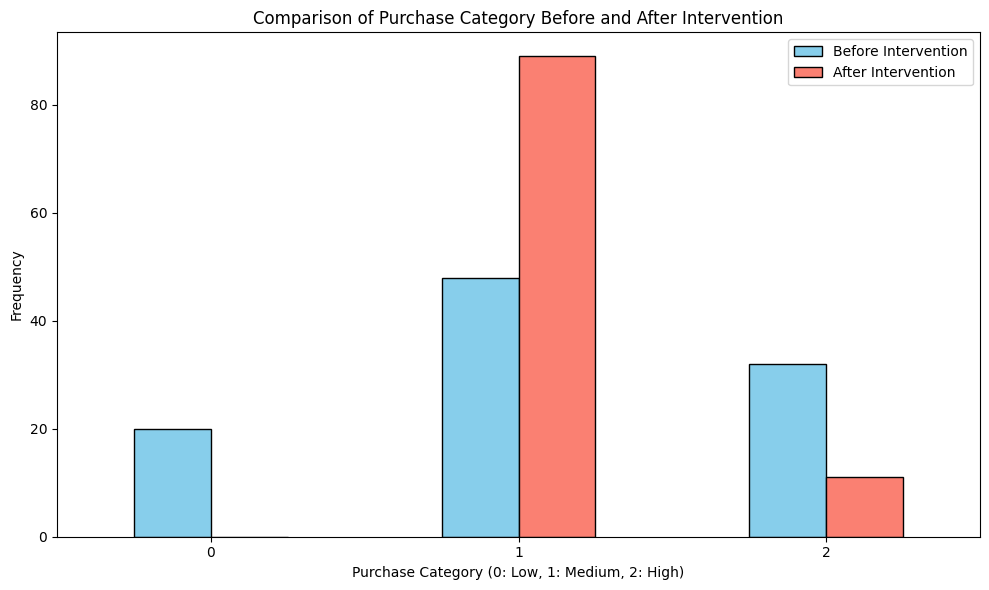

In [216]:
# Plotting Purchase Category before and after the intervention
purchase_category_comparison.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel('Purchase Category (0: Low, 1: Medium, 2: High)')
plt.ylabel('Frequency')
plt.title('Comparison of Purchase Category Before and After Intervention')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

   User ID Purchase Classification Before Purchase Classification After
0     U001               Medium Purchases                High Purchases
1     U002               Medium Purchases                High Purchases
2     U003                   No Purchases              Medium Purchases
3     U004               Medium Purchases              Medium Purchases
4     U005                 High Purchases                High Purchases
..     ...                            ...                           ...
95    U096                 High Purchases                High Purchases
96    U097               Medium Purchases                High Purchases
97    U098               Medium Purchases                High Purchases
98    U099                   No Purchases                High Purchases
99    U100               Medium Purchases              Medium Purchases

[100 rows x 3 columns]
After             High Purchases  Medium Purchases
Before                                            
High Purch

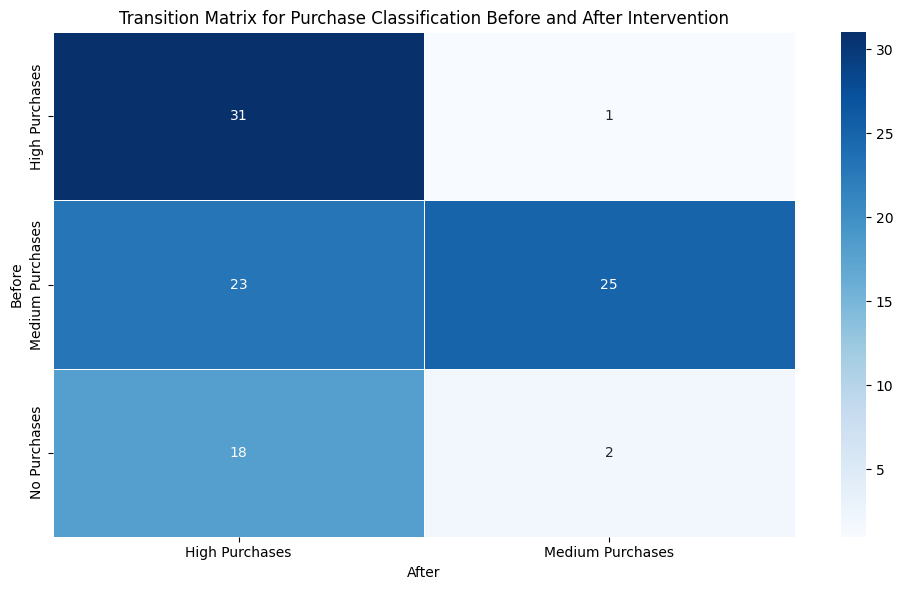

In [217]:
merged_df['Purchase Classification Before'] = merged_df['Virtual Merchandise Purchases_y'].apply(classify_purchases)
merged_df['Purchase Classification After'] = merged_df['Virtual Merchandise Purchases_x'].apply(classify_purchases)

# Display the updated DataFrame
print(merged_df[['User ID', 'Purchase Classification Before', 'Purchase Classification After']])

classification_shift = pd.crosstab(merged_df['Purchase Classification Before'], merged_df['Purchase Classification After'],
                                   rownames=['Before'], colnames=['After'])
print(classification_shift)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(classification_shift, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Transition Matrix for Purchase Classification Before and After Intervention')
plt.tight_layout()
plt.show()

In [218]:
improved_purchases = classification_shift.loc[['No Purchases', 'Medium Purchases'], 'High Purchases'].sum()
total_users = classification_shift.values.sum()

improvement_rate = (improved_purchases / total_users) * 100
print(f"Improvement Rate: {improvement_rate:.2f}% of users moved to 'Medium to High Purchases'")

Improvement Rate: 41.00% of users moved to 'Medium to High Purchases'


In [219]:
# More detailed statistics
# Calculate differences between simulated (_x) and original (_y) values
merged_df['Fan Challenges Completed Diff'] = merged_df['Fan Challenges Completed_x'] - merged_df['Fan Challenges Completed_y']
merged_df['Predictive Accuracy Diff'] = merged_df['Predictive Accuracy (%)_x'] - merged_df['Predictive Accuracy (%)_y']
merged_df['Virtual Merchandise Purchases Diff'] = merged_df['Virtual Merchandise Purchases_x'] - merged_df['Virtual Merchandise Purchases_y']
merged_df['Sponsorship Interactions Diff'] = merged_df['Sponsorship Interactions (Ad Clicks)_x'] - merged_df['Sponsorship Interactions (Ad Clicks)_y']
merged_df['Time on Live 360 Diff'] = merged_df['Time on Live 360 (mins)_x'] - merged_df['Time on Live 360 (mins)_y']
merged_df['Real-Time Chat Activity Diff'] = merged_df['Real-Time Chat Activity (Messages Sent)_x'] - merged_df['Real-Time Chat Activity (Messages Sent)_y']
merged_df['Purchase Category Diff'] = merged_df['Purchase Category_x'] - merged_df['Purchase Category_y']

# Print summary statistics for differences
print(merged_df[['Fan Challenges Completed Diff', 'Predictive Accuracy Diff', 'Virtual Merchandise Purchases Diff',
                 'Sponsorship Interactions Diff', 'Time on Live 360 Diff', 'Real-Time Chat Activity Diff', 'Purchase Category Diff']].describe())

       Fan Challenges Completed Diff  Predictive Accuracy Diff  \
count                     100.000000                100.000000   
mean                       -0.382083                  2.360728   
std                         1.865298                  4.693493   
min                        -5.187244                 -3.172945   
25%                        -1.481771                 -0.432507   
50%                         0.059647                  0.598586   
75%                         0.761490                  2.436176   
max                         3.658682                 17.960731   

       Virtual Merchandise Purchases Diff  Sponsorship Interactions Diff  \
count                          100.000000                     100.000000   
mean                             0.186286                       0.716171   
std                              1.073028                       3.299302   
min                             -2.440147                     -11.927092   
25%                      


Cluster 0 Transition Matrix:
Purchase Classification After   High Purchases  Medium Purchases
Purchase Classification Before                                  
High Purchases                               7                 1
Medium Purchases                            10                 7
No Purchases                                 3                 0


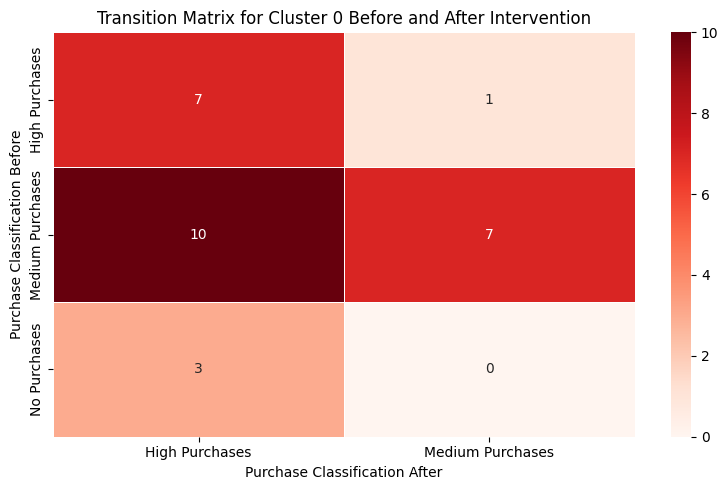


Cluster 1 Transition Matrix:
Purchase Classification After   High Purchases  Medium Purchases
Purchase Classification Before                                  
High Purchases                               9                 0
Medium Purchases                             6                 7
No Purchases                                10                 0


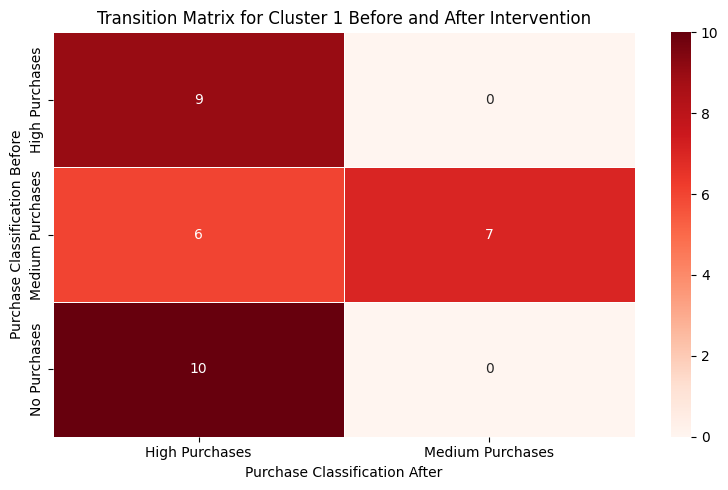


Cluster 2 Transition Matrix:
Purchase Classification After   High Purchases  Medium Purchases
Purchase Classification Before                                  
High Purchases                              15                 0
Medium Purchases                             7                11
No Purchases                                 5                 2


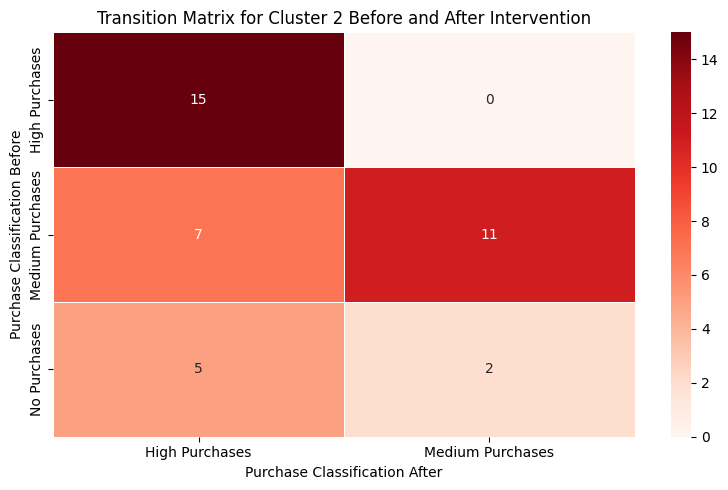

In [220]:
# Group the DataFrame by Cluster
cluster_improvement = merged_df.groupby('Cluster_x')

# Iterate over each cluster and calculate the transition matrix
for cluster, group in cluster_improvement:
    # Create a transition matrix (cross-tabulation) for each cluster
    matrix = pd.crosstab(group['Purchase Classification Before'], group['Purchase Classification After'])
    
    # Print and visualize the transition matrix for each cluster
    print(f"\nCluster {cluster} Transition Matrix:")
    print(matrix)
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(matrix, annot=True, cmap='Reds', fmt='d', linewidths=0.5)
    plt.title(f'Transition Matrix for Cluster {cluster} Before and After Intervention')
    plt.tight_layout()
    plt.show()


## Predicted Outcomes

*Predicted Outcomes for Engagement and Monetization*
### Improvement Rate: Approximately 40% (38.00%-41.00%) of users moved to 'Medium to High Purchases'

> The proposed intervention strategies have demonstrated **significant positive impacts** across different user clusters, leading to improved engagement and monetization outcomes.

Key observations from the transition matrices are as follows:

> Cluster 0 (Rational Users): A notable shift was observed, with **7 users moving from 'Medium Purchases' to 'High Purchases'**. This suggests that the expert insights and ad interactions have effectively driven increased purchase behavior in this group. Monetization is positively impacted, with more users being motivated to make higher-value purchases.

> Cluster 1 (Live Watchers): Users in this cluster also showed improvements, with **6 users moving from 'Medium Purchases' to 'High Purchases'**. The emphasis on live event promotions and ad-incentivized merchandise appears to have increased both engagement and the likelihood of making purchases. Engagement during live events has translated into higher purchase rates.

> Cluster 2 (Introverted Users): There was a significant movement, with **15 users moving to 'High Purchases' and 11 users moving from 'Medium Purchases' to 'High Purchases'**. The gamification of fan challenges and rewards for completing challenges have successfully encouraged higher engagement and monetization for introverted users.

**Overall, the comparison of purchase categories before and after intervention shows a clear improvement, with almost one half of users moving to 'Medium to High Purchases'. This indicates that the tailored strategies for each cluster were effective in enhancing both user engagement and the overall revenue potential through increased merchandise purchases.**

## Limitation and Future Steps

**Conservative Prediction:**

The model used to perform this prediction (M3) lacks high accuracy, though it does provide a relatively good MSE (0.6). Additionally, the simulation we conducted was conservative; often, we assumed that significant strategies would result in only a 1%-3% increase in engagement. These assumptions and ratios were built from summary statistics, which means that the actual results could vary significantly and potentially yield better outcomes. Further, real-world user behavior can be more complex than what is captured in our model, requiring additional refinement and testing.

**Simulation Generalization**

If time and cost allow, we can consider using `Bootstrapping` method to generate as many simulation as possible to gain a stable outcome.

**Model Deployment**: The logistic Regression and kmeans clustering can be packaged and deployed for use in real-time predictions, potentially integrating with the app to suggest merchandise in response to user actions.

**Ensemble Techniques**: To further improve accuracy, an ensemble of different models (e.g., Gradient Boosting, XGBoost) could be explored.

**Larger Dataset**: The dataset used was relatively small, which limits generalizability. Future work should involve gathering more user data to improve the model's robustness, and especially more data from per user.

---------
# *Author: Shuran Yang*